## Matplotlib recreation of the TikZ prednisone diagram

This notebook draws the diagram using `matplotlib` patches to mirror the TikZ coordinates and labels.


In [1]:
import matplotlib.pyplot as plt
from src.dynamical_systems.prednisone_3D import Prednisone3D
import numpy as np

from matplotlib.patches import Circle, FancyArrow, Polygon
from plot_styles import load_general_styles, load_gravitational_waves_styles, load_prednisone_3D_styles, load_restricted_unrestricted_styles

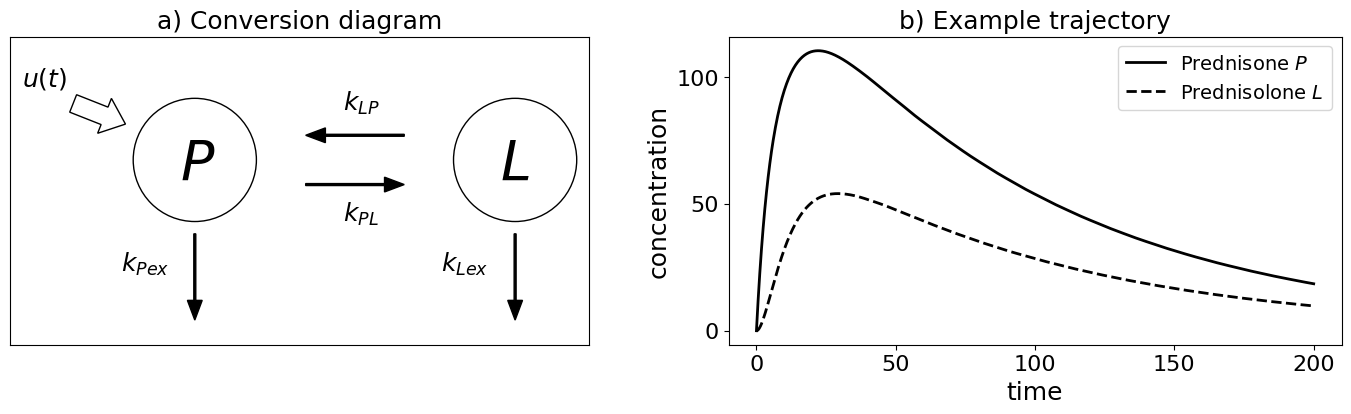

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [78]:
# Load plotting styles
general_styles = load_general_styles()
pred_styles = load_prednisone_3D_styles()

# define fontsizes
label_fontsize = 18
title_fontsize = 18
legend_fontsize = 14
marker_size = 12, 
scatter_area = 144, 
line_width = 2
tick_fontsize = 16

font_size_k = label_fontsize
font_size_PL = 40

# shift parameters
y_shift_global = 5
x_shift_arrow = -15
y_shift_arrow = -5 + y_shift_global

# define prednisone model
model = Prednisone3D()

# define time interval
t_eval = np.linspace(0, 200, 1000)

# solve ODE
sol_ODE = model.solve_ODE(
    t_eval = t_eval, 
    init_cond = np.array([0, 0]), 
    parameters = np.array([0.1, 0.1, 0.1])
)

# TikZ uses yscale=-1, so we will invert y-axis after plotting
fig, axs = plt.subplots(1, 2, figsize=(general_styles['column_width'], 4))

# Helper to match TikZ arrow tip appearance
arrow_kw = dict(width=0.8, head_width=6, head_length=8, length_includes_head=True, color='black')

# Circles: centers are (81.18,40.67) and (193.83,40.67), radii ~ (106.18-81.18)=25 and (218.83-193.83)=25
circle_P = Circle((70, 40 + y_shift_global), radius=25.0, fill=False, linewidth=1.0)
circle_L = Circle((200, 40 + y_shift_global), radius=25.0, fill=False, linewidth=1.0)
axs[0].add_patch(circle_P)
axs[0].add_patch(circle_L)

# Downward arrows below each circle (approx from (x,70.17) to (x,105.83))


# Right arrow polygon at left (u(t) input) using given TikZ polygon points
right_arrow_pts = [
    (37.03 + x_shift_arrow, 18.54 + y_shift_arrow), (49.77 + x_shift_arrow, 23.57 + y_shift_arrow), (51.16 + x_shift_arrow, 20.03 + y_shift_arrow), (56.86 + x_shift_arrow, 30.46 + y_shift_arrow),
    (45.57 + x_shift_arrow, 34.19 + y_shift_arrow), (46.97 + x_shift_arrow, 30.65 + y_shift_arrow), (34.23 + x_shift_arrow, 25.62 + y_shift_arrow)
]

axs[0].add_patch(Polygon(right_arrow_pts, closed=True, facecolor='none', edgecolor='black'))

# Horizontal arrows between circles: LP (leftwards at y=31.17), PL (rightwards at y=51.17)
axs[0].add_patch(FancyArrow(155, 30 + y_shift_global, -40, 0, **arrow_kw))   # k_LP
axs[0].add_patch(FancyArrow(115, 50 + y_shift_global,  40, 0, **arrow_kw))   # k_PL
axs[0].add_patch(FancyArrow(70, 70 + y_shift_global, 0, 35, **arrow_kw))     # downward left
axs[0].add_patch(FancyArrow(200, 70 + y_shift_global, 0, 35, **arrow_kw))    # downward right

# Text labels
axs[0].text(64, 48 + y_shift_global, r'$P$', fontsize=font_size_PL)
axs[0].text(194, 48 + y_shift_global, r'$L$', fontsize=font_size_PL)

axs[0].text(130, 20 + y_shift_global, r'$k_{LP}$', fontsize=font_size_k)
axs[0].text(130, 65 + y_shift_global, r'$k_{PL}$', fontsize=font_size_k)

axs[0].text(40, 85 + y_shift_global, r'$k_{Pex}$', fontsize=font_size_k)
axs[0].text(170, 85 + y_shift_global, r'$k_{Lex}$', fontsize=font_size_k)

axs[0].text(0, 10 + y_shift_global, r'$u(t)$', fontsize=font_size_k)

# set equal aspect, set limits to fit original TikZ picture bounds
axs[0].set_aspect('equal', adjustable='box')
axs[0].set_xlim(-5, 230)
axs[0].set_ylim(-5, 120)

# invert y
axs[0].invert_yaxis()

# annotations
axs[0].set_title(r'a) Conversion diagram', fontsize=title_fontsize)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Hide axes
# axs[0].axis('off')

# --- Right panel ---
axs[1].plot(t_eval, sol_ODE[0, :], linestyle = '-', linewidth=line_width, color = 'k')
axs[1].plot(t_eval, sol_ODE[1, :], linestyle = '--', linewidth=line_width, color = 'k')

# annotations
axs[1].set_xlabel('time', fontsize = label_fontsize)
axs[1].set_ylabel('concentration', fontsize=label_fontsize)
axs[1].set_title(r'b) Example trajectory', fontsize=title_fontsize)
axs[1].set_xticks([0, 50, 100, 150, 200])
axs[1].set_yticks([0, 50, 100])
axs[1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axs[1].legend([r'Prednisone $P$', 'Prednisolone $L$'], fontsize=legend_fontsize)

#fig.tight_layout()
plt.show()

fig.savefig("Figures/prednisone_diagram.eps", format="eps", bbox_inches="tight")     # uncomment to save figure
